> **a picture is worth a thousand words**


Data visualization is the presentation of data in a pictorial or graphical format. It enables decision makers to see analytics presented visually, so they can grasp difficult concepts or identify new patterns.


now here's a cool shortcut to use : 


**Shift + Tab after attribute to see options** 


# some resrouces

- [data to viz](https://www.data-to-viz.com)
 From Data to Viz leads you to the most appropriate graph for your data. It links to the code to build it and lists common caveats you should avoid.

- [dataviz catalogue](https://datavizcatalogue.com/index.html)
 
 Same as the above 

### import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Auto reloads notebook when changes are made
%reload_ext autoreload
%autoreload 2

### Import Data

In [ ]:
# You can import custom data
#cs_df = pd.read_csv('ComputerSales.csv')

# Seaborn provides built in datasets
print(sns.get_dataset_names())

# Load a built in dataset based on US State car crash percentages
crash_df = sns.load_dataset('car_crashes')

tips_df = sns.load_dataset("tips")

iris_df=sns.load_dataset('iris')

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [ ]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## line plot

Text(0.5, 1.0, 'gomycode line ! fancy huh ')

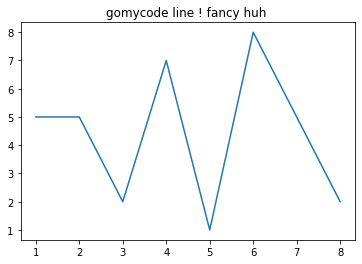

In [ ]:
#data = [1,2,3,4,5,6,7,8]
#data_2 = [5,5,2,7,1,8,5,2]
data = range(1,9) #[1,2,3,4,5,6,7,8]
data_2 =  [5,5,2,7,1,8,5,2]

plt.plot(data,data_2)

plt.title("gomycode line ! fancy huh ")

## Distribution Plot

Provides a way to look at a univariate distribution ( a distribution for one variable). 

- **Kernal Density Estimation (KDE)** with a Histogram is provided. set  `kde=False` removes the KDE
- Bins define how many buckets to divide the data up into between intervals (For example put all profits between \\$10 - \\$35 in this bucket )

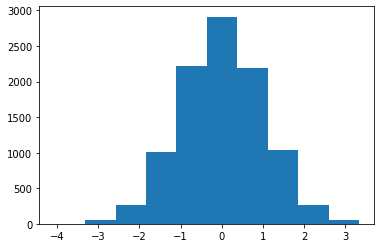

array([-0.08075616, -1.883232  ,  0.47949943, ...,  1.54403852,
       -0.49930281,  2.5051662 ])

In [ ]:
data = np.random.normal(0,1,10000)  # mean of 170 , std of 10 , num of indivs 250
plt.hist(data)

plt.show()
data

d:\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='not_distracted', ylabel='Density'>

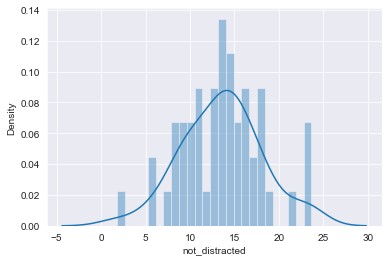

In [ ]:
sns.distplot(crash_df['not_distracted'], kde=True, bins=25)

## Bar Plots

Focus on distributions using categorical data in reference to one of the numerical columns

 - Aggregate categorical data based on a function (mean is the default) or using functions provided by NumPy : median, std, var, cov or make your own functions
 - in the example below , it Estimates total bill amount based on sex


In [ ]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='sex', ylabel='total_bill'>

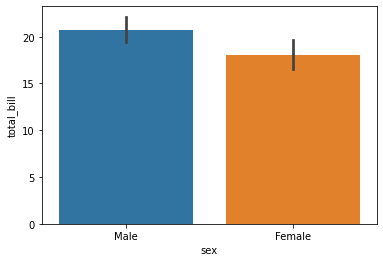

In [ ]:
sns.barplot(x='sex',y='total_bill',data=tips_df, estimator=np.mean)

## count plot

count plot , **a special case of bar plot** such that the estimator is counting 
the number of occurances

<AxesSubplot:xlabel='sex', ylabel='count'>

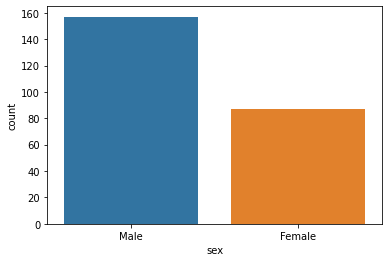

In [ ]:
sns.countplot(x='sex',data=tips_df)

 ## scatter plot

scatter plot ! a multivariate  mostly used to showcase correlation , trends and distribution of the data poins between two varialbes.

- we may use `hue = "categorical_column_name"`  to pass in a categorical column and the data points will be colorized

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

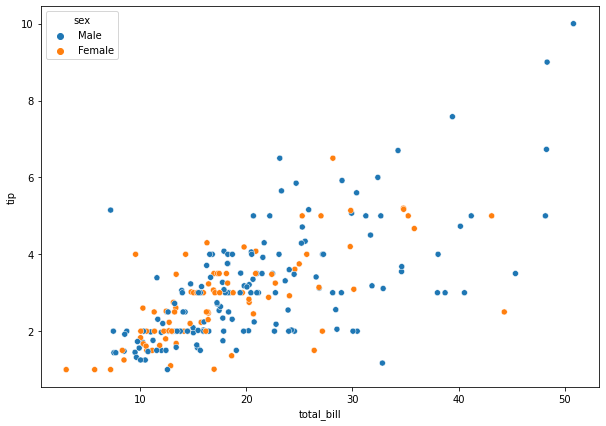

In [ ]:
plt.figure(figsize=[10,7])
sns.scatterplot(data=tips_df, x="total_bill", y="tip",hue="sex")

## Box Plot (one variable)

The box shows the quartiles of the data. The bar in the middle is the median and
the box extends 1 standard deviation from the median

<img src= "https://www.simplypsychology.org/boxplot.jpg?ezimgfmt=rs:555x285/rscb24/ng:webp/ngcb24" /> 


The whiskers extend to all the other data aside from the points that are considered
to be outliers

<AxesSubplot:xlabel='total_bill'>

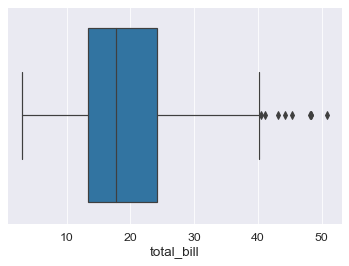

In [ ]:
sns.boxplot(x='total_bill',data=tips_df)

## box plot (multi-variable)

- Hue can add another category being sex
- in the example below , We see men spend way more on Friday versus less than women on Saturday
- in genral we may compare : 
   - Comparison of location : comparision between medians
   - Comparison of dispersion : the interquantile range represent how scattered data points are 
   - Comparison of skewness : if the data is **right-skewed** (median close to min) , or **left-skewed** (median close to max )
   

No handles with labels found to put in legend.


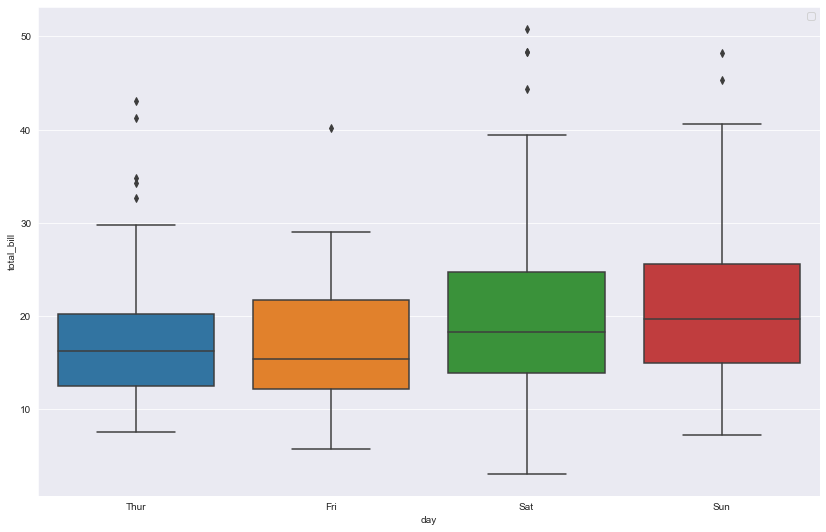

In [ ]:
plt.figure(figsize=(14,9))
sns.set_style('darkgrid')

sns.boxplot(x='day',y='total_bill',data=tips_df)

# Moves legend to the best position
plt.legend(loc=0)

## Joint Plot

Jointplot compares 2 distributions (multivariate distribution) and plots a scatter plot by default :
- also, you have the possibility to create a regression using `kind='reg'` in order to showcase the latent trends
- You can create a 2D KDE with `kind='kde'`
- You can also create a hexagon distribution with `kind='hex'`

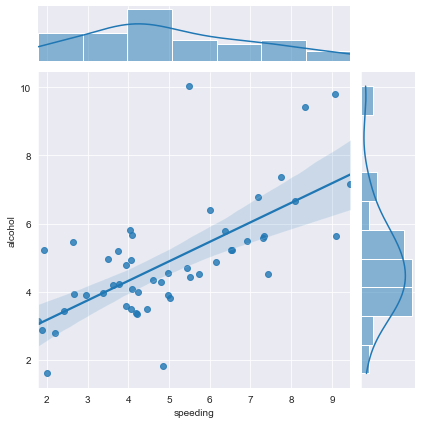

In [ ]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

## KDE Plot

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

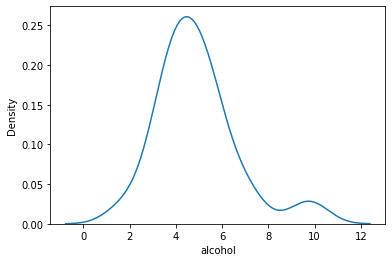

In [ ]:
# Get just the KDE plot
sns.kdeplot(crash_df['alcohol'])

## Pair Plots

Pair Plot plots relationships across the entire data frames **numerical values** 
 - With hue you can pass in a categorical column and the charts will be colorized
 - You can use color maps from Matplotlib to define what colors to use , exp : 
   ``` sns.pairplot(tips_df, hue='sex', palette='Blues') ```

In [ ]:
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [ ]:
sns.pairplot(data=crash_df,x_vars=["speeding","alcohol","not_distracted"],y_vars=["speeding","alcohol","not_distracted"],hue="abbrev")

## Styling

<Figure size 576x288 with 0 Axes>

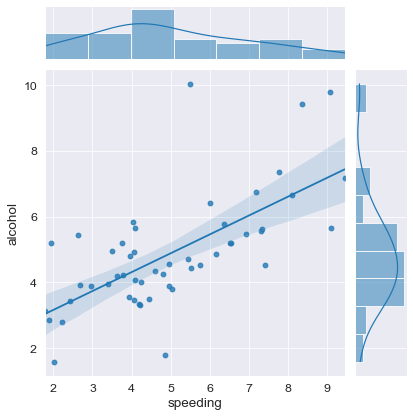

In [ ]:
# You can set styling for your axes and grids
# white, darkgrid, whitegrid, dark, ticks
sns.set_style('darkgrid')

# You can use figure sizing from Matplotlib
plt.figure(figsize=(8,4))

# Change size of lables, lines and other elements to best fit
# how you will present your data (paper, talk, poster)
sns.set_context('paper', font_scale=1.4)

sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

# Get rid of spines
# You can turn of specific spines with right=True, left=True
# bottom=True, top=True
sns.despine(left=False, bottom=False)

## Heatmaps

### correlation and covariance

let's first define what is a correlation and what is a covariance and the difference between them :
 - covariance :
   <img src="https://cdn.corporatefinanceinstitute.com/assets/covariance1.png" width = "300"  height = "300"/>
   
    - $X$ : values of varialbe x
    - $Y$ : values of variable y
    - $\hat{X}$ : mean  of variable X
    - $\hat{Y}$ : mean  of variable X
    - $n$ : number of individuals
 
 - correlation :
    <img src="https://cdn.corporatefinanceinstitute.com/assets/covariance3.png" width = "300"  height = "300"/>
    
    -  $\sigma_{X}$ : standard deviation of X
    -  $\sigma_{Y}$ : standard deviation of Y
    


 - covariance vs correlation ?:     
 
 
They both primarily assess the relationship between variables.

Covariance measures the total variation of two random variables from their expected values. Using covariance, we can **only gauge the direction of the relationship** (whether the variables tend to move in tandem or show an inverse relationship). However, it **does not indicate the strength of the relationship**, nor the **dependency** between the variables.

On the other hand, correlation measures the **strength of the relationship between variables**. Correlation is the scaled measure of covariance.

### heatmap function

In [ ]:
crash_df.corr()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


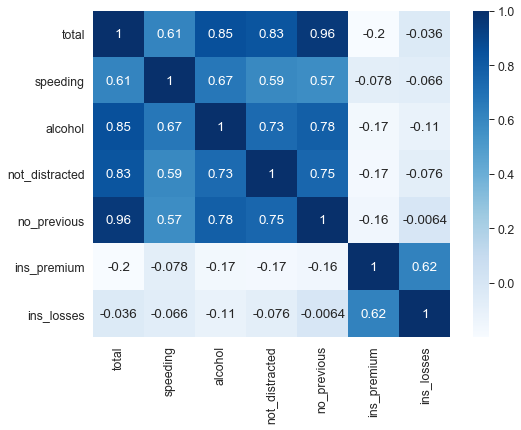

In [ ]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
# To create a heatmap with data you must have data set up as a matrix where variables
# are on the columns and rows

crash_mx = crash_df.corr()

# Create the heatmap, add annotations and a color map
sns.heatmap(crash_mx, annot=True, cmap='Blues')

In [ ]:
flights = sns.load_dataset("flights")

In [ ]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
flights = flights.pivot_table(index='month', columns='year', values='passengers')
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

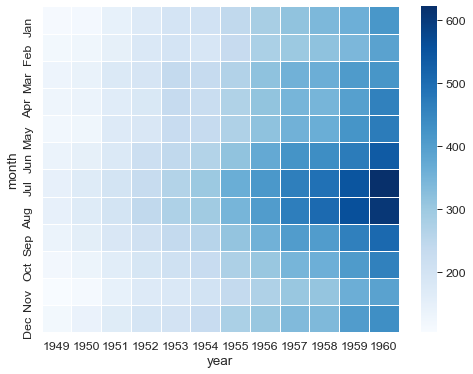

In [ ]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)


sns.heatmap(flights, cmap='Blues', linecolor='white', linewidth=1)

## violinplot

<img src="https://miro.medium.com/max/520/1*TTMOaNG1o4PgQd-e8LurMg.png" />

In general, violin plots are a method of plotting numeric data and can be considered a combination of the **box plot** with a **kernel density plot**.

d:\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sex', ylabel='tip'>

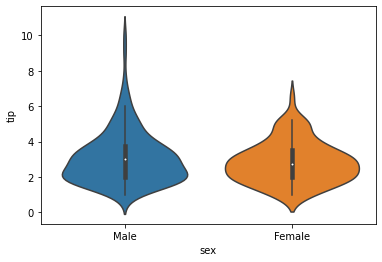

In [ ]:
sns.violinplot("sex","tip",data=tips_df)

d:\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='day', ylabel='tip'>

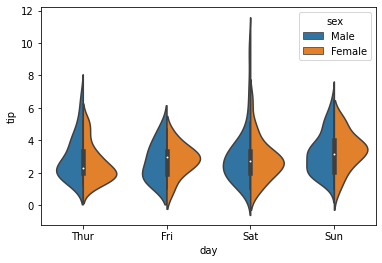

In [ ]:
sns.violinplot("day","tip",hue="sex",data=tips_df,split=True)

## Regression Plots

 We can plot a regression plot studying whether total bill effects the tip
 - hue is used to show separation based off of categorical data
 - We see that males tend to tip slightly more
 

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

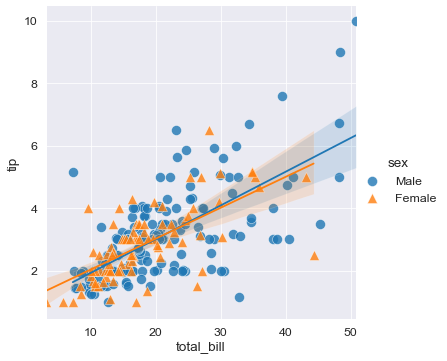

In [ ]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

plt.figure(figsize=(8,6))


sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips_df, markers=['o', '^'], 
          scatter_kws={'s': 100, 'linewidth': 0.5, 'edgecolor': 'w'})

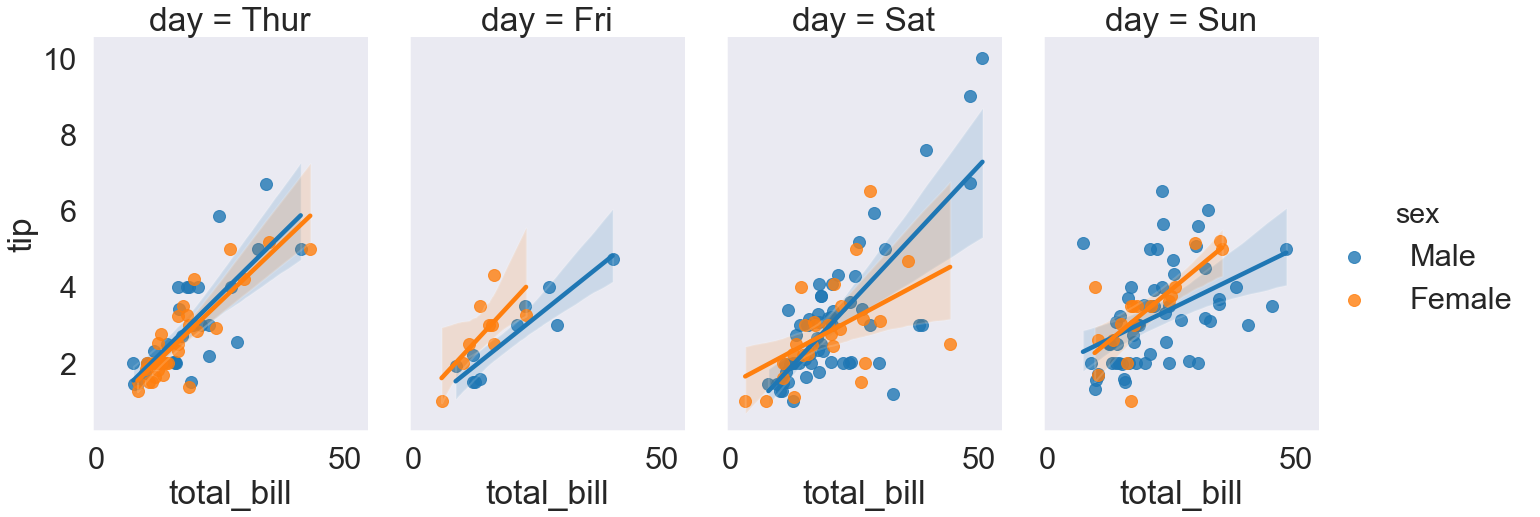

In [ ]:
# You can separate the data into separate columns for day data
# sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data=tips_df)
tips_df.head()

# Makes the fonts more readable
sns.set_context('poster', font_scale=1.4)

sns.lmplot(x='total_bill', y='tip', data=tips_df, col='day', hue='sex',
          height=8, aspect=0.6)

In [ ]:
tips_df["sex"]=tips_df["sex"].cat.codes
tips_df["smoker"]=tips_df["smoker"].cat.codes

d:\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


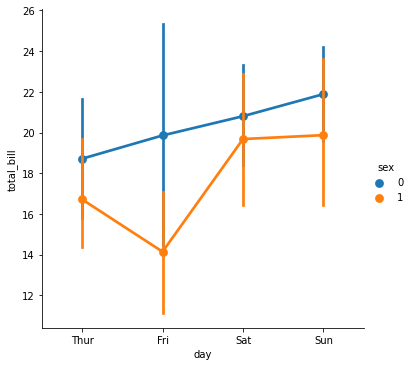

In [ ]:
sns.catplot("day","total_bill",hue="sex",data=tips_df,kind="point")

In [ ]:
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,1,Sun,Dinner,2
1,10.34,1.66,0,1,Sun,Dinner,3
2,21.01,3.50,0,1,Sun,Dinner,3
3,23.68,3.31,0,1,Sun,Dinner,2
4,24.59,3.61,1,1,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,0,1,Sat,Dinner,3
240,27.18,2.00,1,0,Sat,Dinner,2
241,22.67,2.00,0,0,Sat,Dinner,2
242,17.82,1.75,0,1,Sat,Dinner,2
